In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset_merged_processed.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0  2015      1    1            4            ANC                 SEA   
1  2015      1    1            4            LAX                 PBI   
2  2015      1    1            4            SFO                 CLT   
3  2015      1    1            4            LAX                 MIA   
4  2015      1    1            4            SEA                 ANC   

   SCHEDULED_DEPARTURE  SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  DIVERTED  \
0                    5           205.0      1448                430       0.0   
1                   10           280.0      2330                750       0.0   
2                   20           286.0      2296                806       0.0   
3                   20           285.0      2342                805       0.0   
4                   25           235.0      1448                320       0.0   

      CANCELLED CANCELLATION_REASON ORIGIN_STATE  ORIGIN_LATITUDE  \
0  No Cancelado           No Aplica           AK         61.17432   
1  No Cancelado           No Aplica           CA         33.94254   
2  No Cancelado           No Aplica           CA         37.61900   
3  No Cancelado           No Aplica           CA         33.94254   
4  No Cancelado           No Aplica           WA         47.44898   

   ORIGIN_LONGITUDE DESTINATION_STATE  DESTINATION_LATITUDE  \
0        -149.99619                WA              47.44898   
1        -118.40807                FL              26.68316   
2        -122.37484                NC              35.21401   
3        -118.40807                FL              25.79325   
4        -122.30931                AK              61.17432   

   DESTINATION_LONGITUDE            AIRLINE_NAME  
0             -122.30931    Alaska Airlines Inc.  
1              -80.09559  American Airlines Inc.  
2              -80.94313         US Airways Inc.  
3              -80.29056  American Airlines Inc.  
4             -149.99619    Alaska Airlines Inc.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444486 entries, 0 to 444485
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   444486 non-null  int64  
 1   MONTH                  444486 non-null  int64  
 2   DAY                    444486 non-null  int64  
 3   DAY_OF_WEEK            444486 non-null  int64  
 4   ORIGIN_AIRPORT         444486 non-null  object 
 5   DESTINATION_AIRPORT    444486 non-null  object 
 6   SCHEDULED_DEPARTURE    444486 non-null  int64  
 7   SCHEDULED_TIME         444486 non-null  float64
 8   DISTANCE               444486 non-null  int64  
 9   SCHEDULED_ARRIVAL      444486 non-null  int64  
 10  DIVERTED               444486 non-null  float64
 11  CANCELLED              444486 non-null  object 
 12  CANCELLATION_REASON    444486 non-null  object 
 13  ORIGIN_STATE           444486 non-null  object 
 14  ORIGIN_LATITUDE        444486 non-nu

In [8]:
df.shape

(444486, 20)

In [9]:
df.isna().sum()

YEAR                     0
MONTH                    0
DAY                      0
DAY_OF_WEEK              0
ORIGIN_AIRPORT           0
DESTINATION_AIRPORT      0
SCHEDULED_DEPARTURE      0
SCHEDULED_TIME           0
DISTANCE                 0
SCHEDULED_ARRIVAL        0
DIVERTED                 0
CANCELLED                0
CANCELLATION_REASON      0
ORIGIN_STATE             0
ORIGIN_LATITUDE          0
ORIGIN_LONGITUDE         0
DESTINATION_STATE        0
DESTINATION_LATITUDE     1
DESTINATION_LONGITUDE    1
AIRLINE_NAME             1
dtype: int64

In [10]:
df.describe()

YEAR     MONTH            DAY    DAY_OF_WEEK  SCHEDULED_DEPARTURE  \
count  444486.0  444486.0  444486.000000  444486.000000        444486.000000   
mean     2015.0       1.0      15.015080       3.942653          1320.757790   
std         0.0       0.0       8.472382       1.952599           469.920482   
min      2015.0       1.0       1.000000       1.000000             5.000000   
25%      2015.0       1.0       8.000000       2.000000           920.000000   
50%      2015.0       1.0      15.000000       4.000000          1316.000000   
75%      2015.0       1.0      22.000000       6.000000          1720.000000   
max      2015.0       1.0      30.000000       7.000000          2359.000000   

       SCHEDULED_TIME       DISTANCE  SCHEDULED_ARRIVAL       DIVERTED  \
count   444486.000000  444486.000000      444486.000000  444486.000000   
mean       140.209638     802.705786        1503.954700       0.002052   
std         74.795588     595.686435         485.065921       0.045250   
min         23.000000      31.000000           1.000000       0.000000   
25%         85.000000     366.000000        1120.000000       0.000000   
50%        121.000000     641.000000        1524.000000       0.000000   
75%        173.000000    1045.000000        1914.000000       0.000000   
max        718.000000    4983.000000        2359.000000       1.000000   

       ORIGIN_LATITUDE  ORIGIN_LONGITUDE  DESTINATION_LATITUDE  \
count    444486.000000     444486.000000         444485.000000   
mean         36.426584        -95.400909             36.423384   
std           5.977051         18.082155              5.974440   
min          13.483450       -176.646030             13.483450   
25%          32.895950       -111.977770             32.895950   
50%          36.198370        -90.258030             36.124480   
75%          40.777240        -81.316030             40.777240   
max          71.285450        -64.798560             71.285450   

       DESTINATION_LONGITUDE  
count          444485.000000  
mean              -95.396000  
std                18.075559  
min              -176.646030  
25%              -111.977770  
50%               -90.258030  
75%               -81.316030  
max               -64.798560

In [11]:
variable_counts = df["CANCELLED"].value_counts()

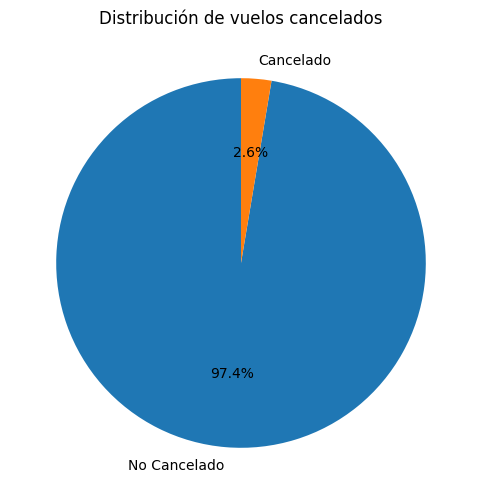

In [12]:
plt.figure(figsize=(6,6))
plt.pie(variable_counts, labels=variable_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de vuelos cancelados")
plt.show()

In [13]:
object_columns = df.select_dtypes(include=["object"]).columns

In [14]:
object_columns = object_columns.drop("CANCELLED")
object_columns

Index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON',
       'ORIGIN_STATE', 'DESTINATION_STATE', 'AIRLINE_NAME'],
      dtype='object')

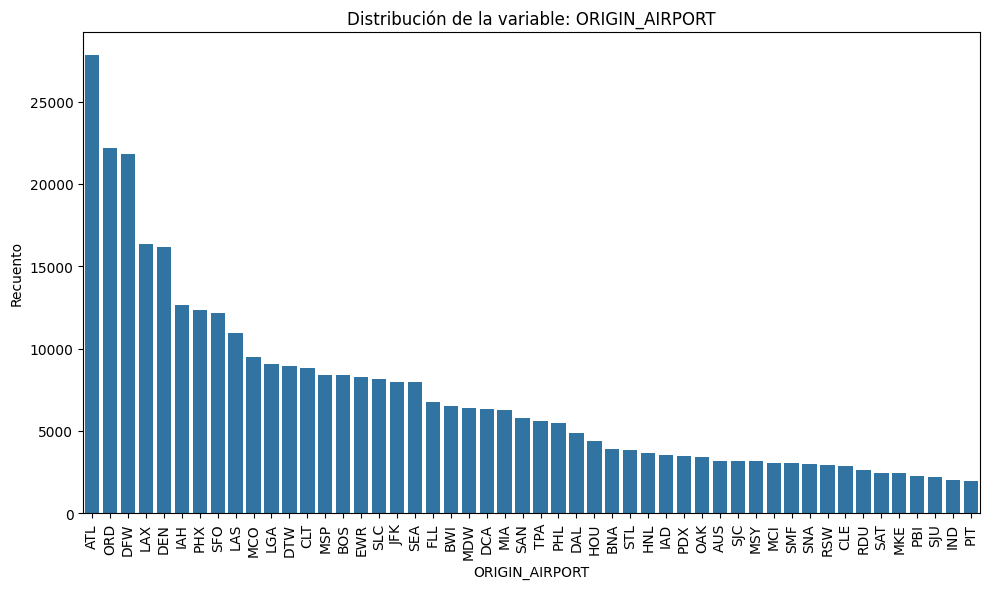

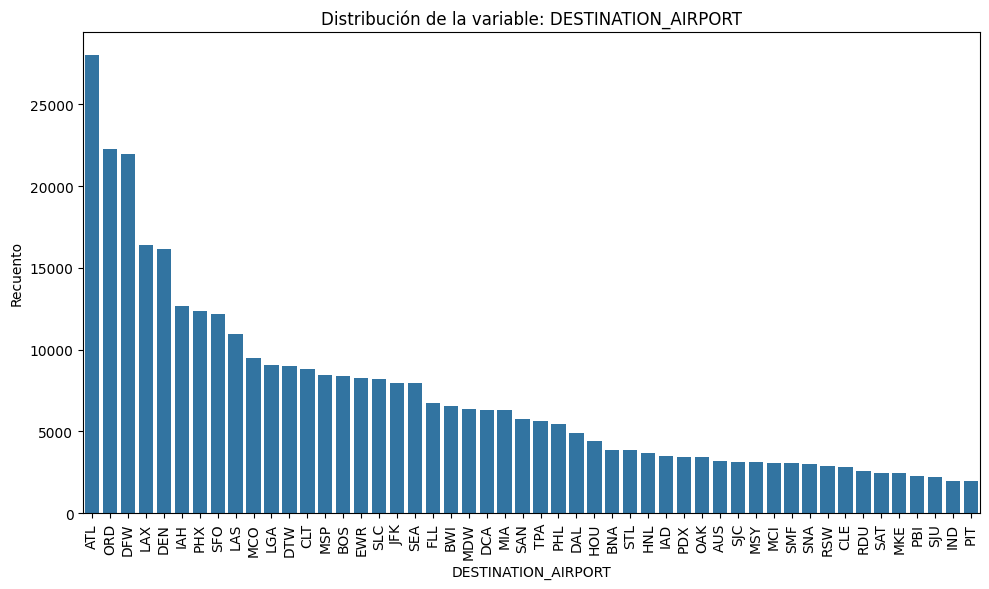

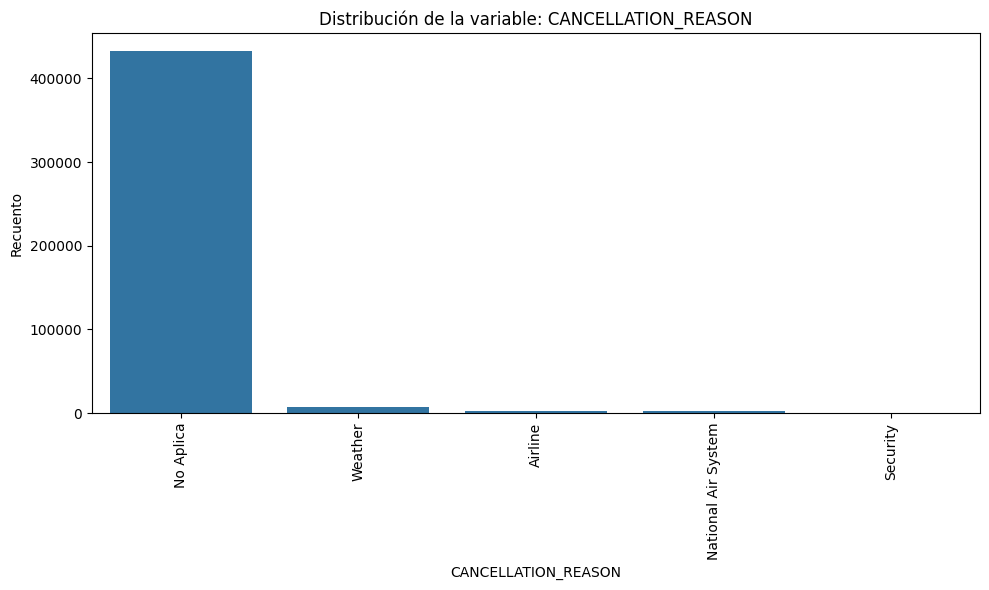

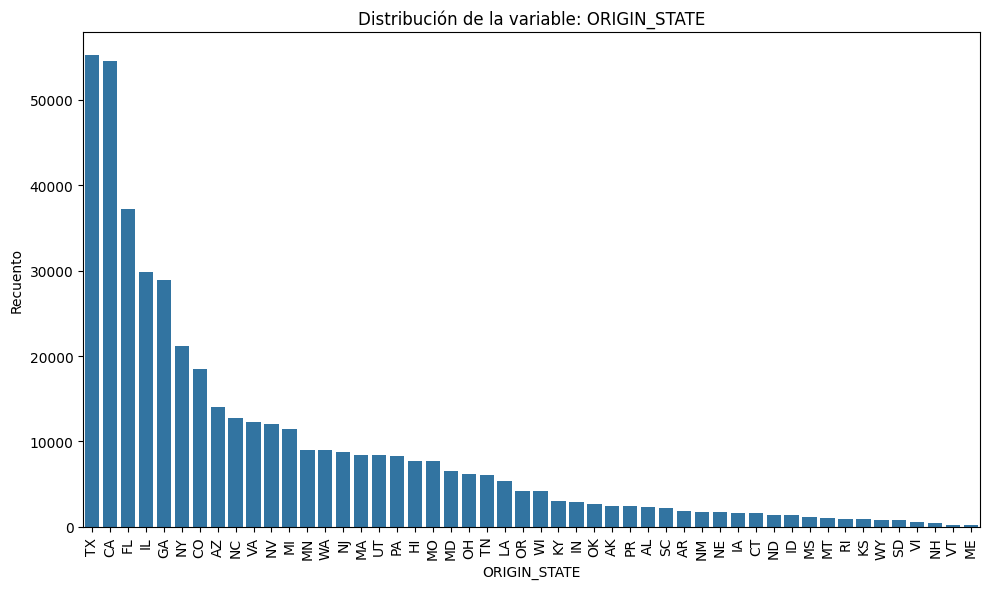

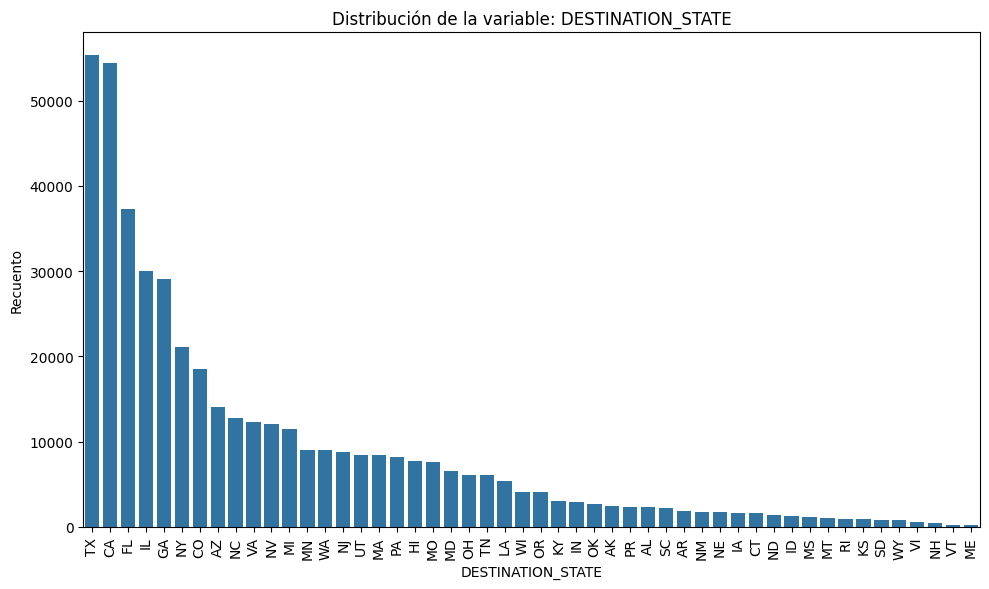

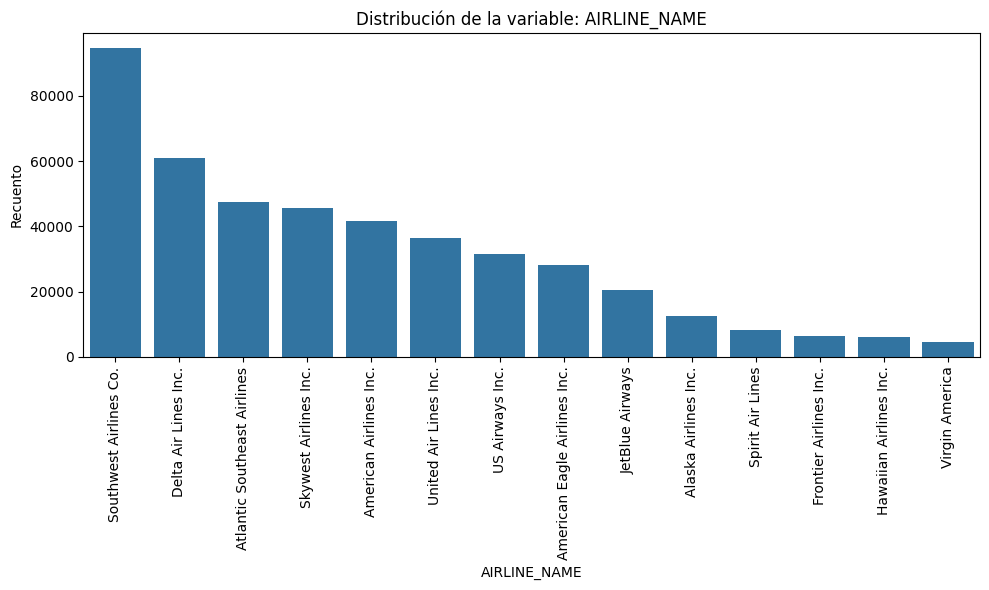

In [15]:
for column in object_columns:
    plt.figure(figsize=(10,6))

    top_values = df[column].value_counts().index[:50]

    sns.countplot(data=df, x=column, order=top_values)
    plt.title(f"Distribución de la variable: {column}")
    plt.xlabel(column)
    plt.ylabel("Recuento")

    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

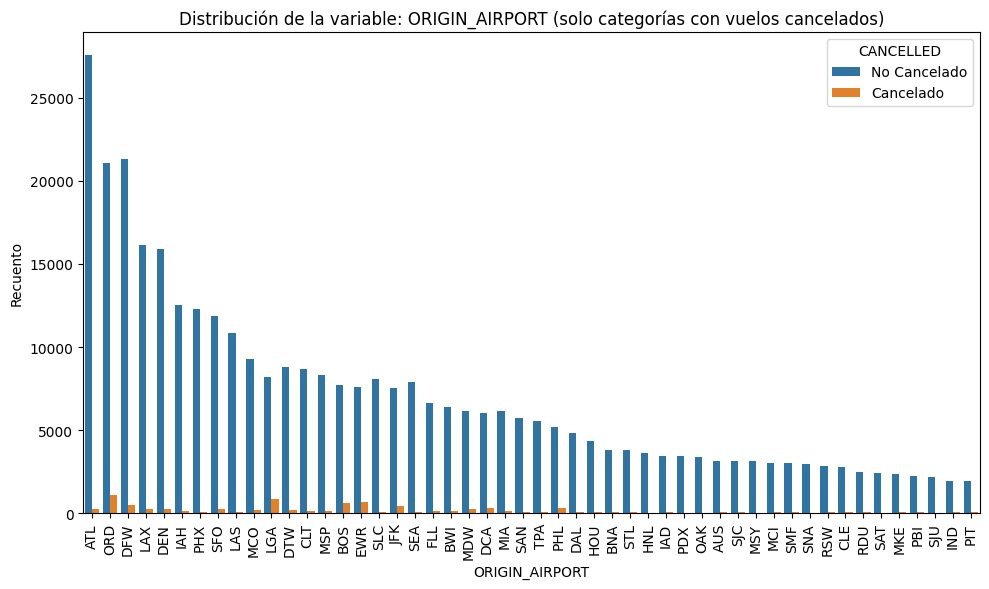

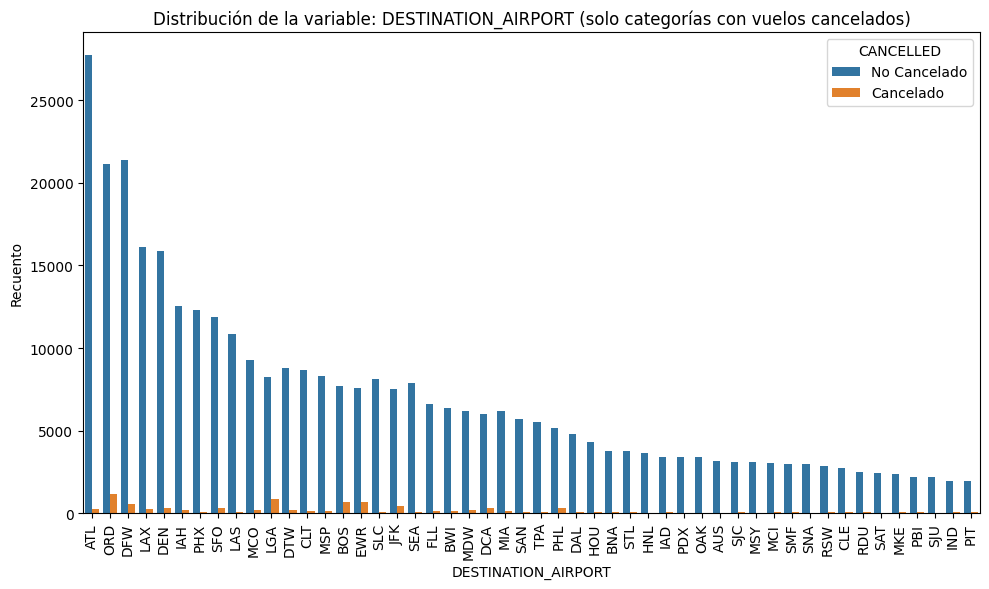

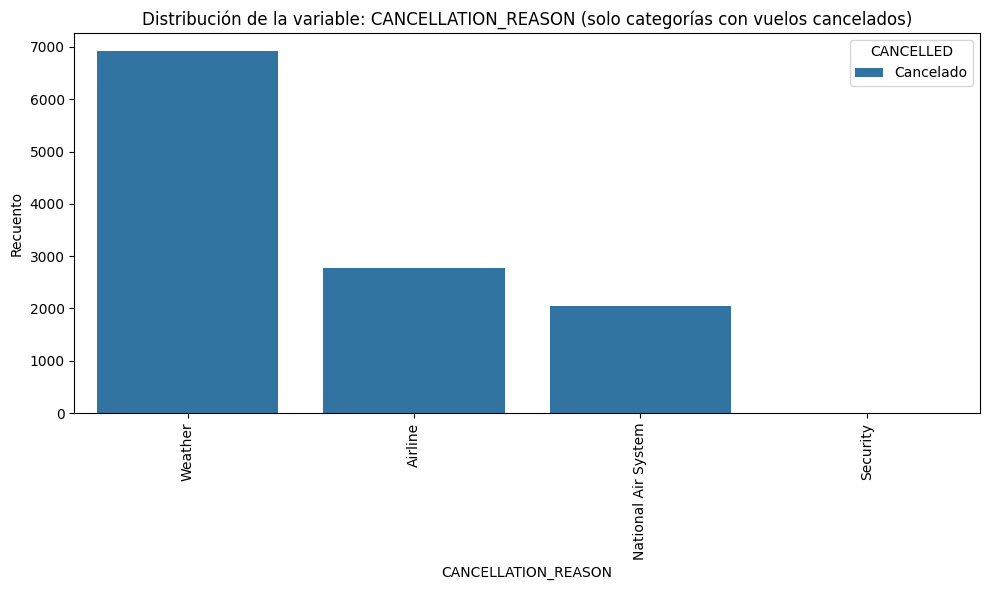

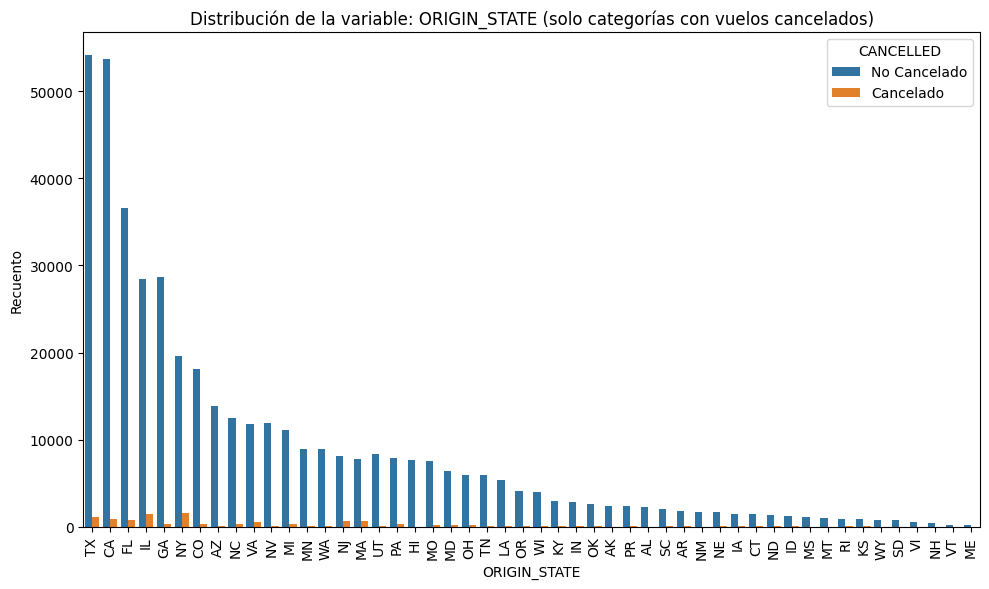

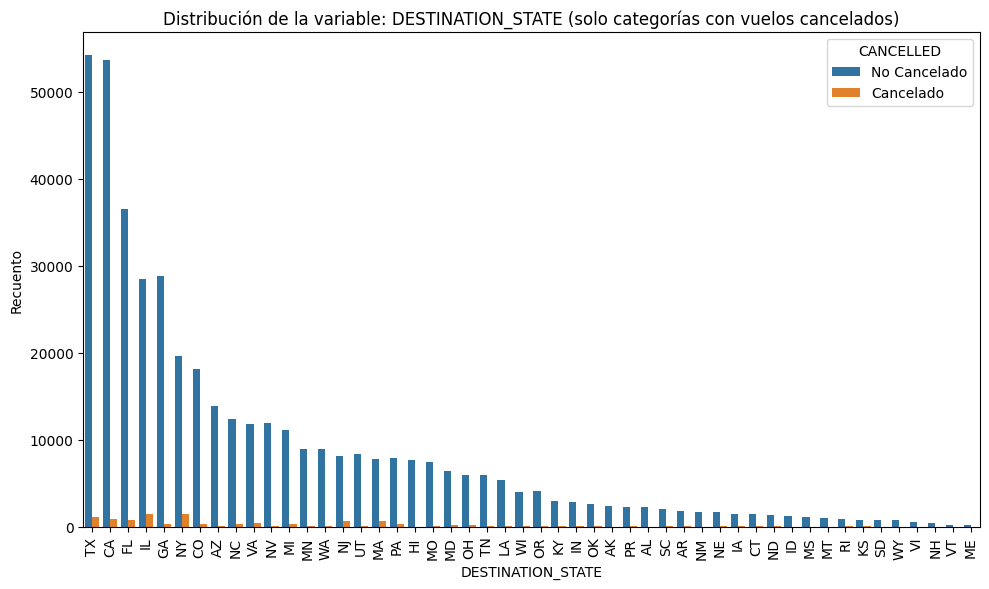

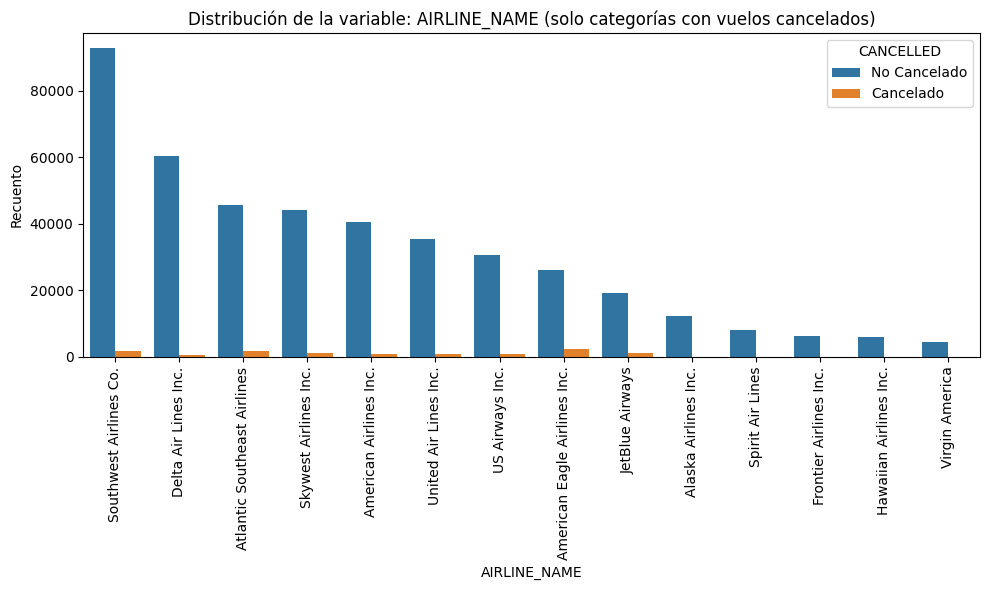

In [16]:
for column in object_columns:
    plt.figure(figsize=(10,6))

    cancelled_counts = df[df["CANCELLED"] != "No Cancelado"][column].value_counts()
    valid_categories = cancelled_counts.index

    df_filtered = df[df[column].isin(valid_categories)]

    top_values = df_filtered[column].value_counts().index[:50]

    sns.countplot(data=df_filtered, x=column, hue="CANCELLED", order=top_values)

    plt.title(f"Distribución de la variable: {column} (solo categorías con vuelos cancelados)")
    plt.xlabel(column)
    plt.ylabel("Recuento")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

La mayoría de las cancelaciones registradas se deben a condiciones meteorológicas adversas, seguidas en menor medida por causas operativas de la aerolínea y del sistema nacional aéreo. Las cancelaciones por motivos de seguridad son excepcionales.

Dado que la mayoría de las cancelaciones se deben al clima, se considera la incorporación de variables meteorológicas como fuente externa complementaria, seguidas por indicadores de congestión aérea y operativa.

In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

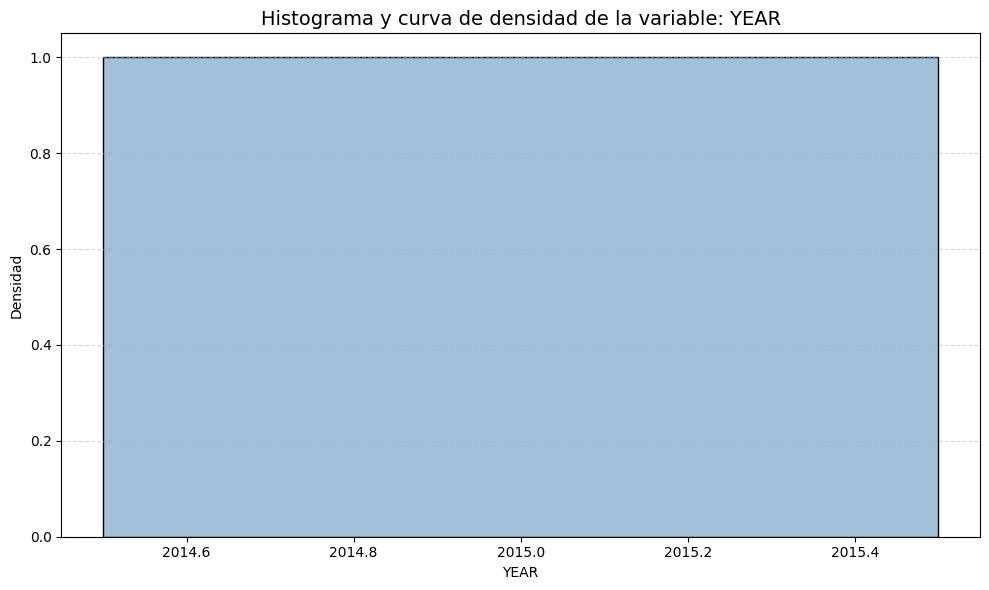

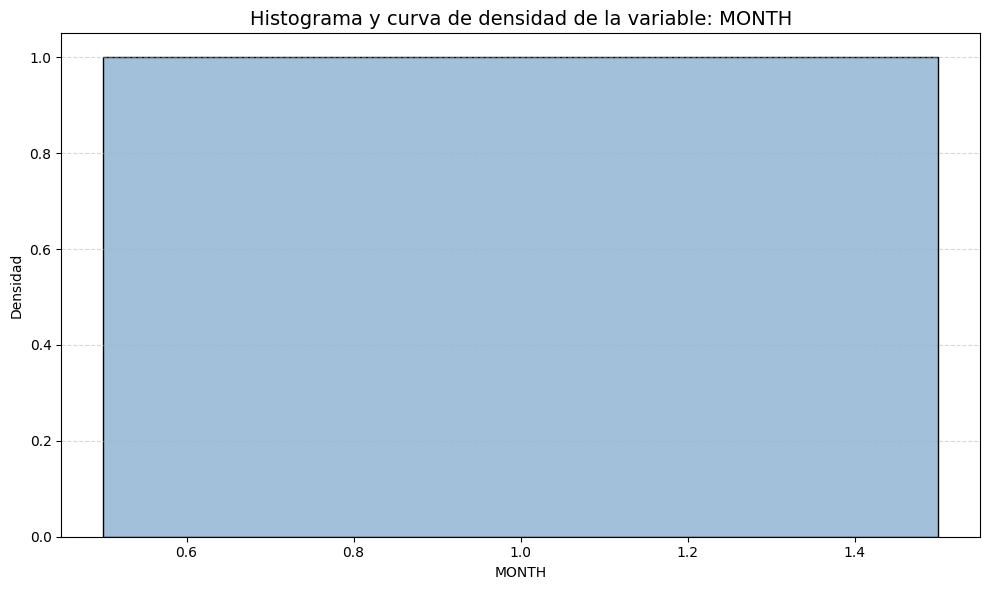

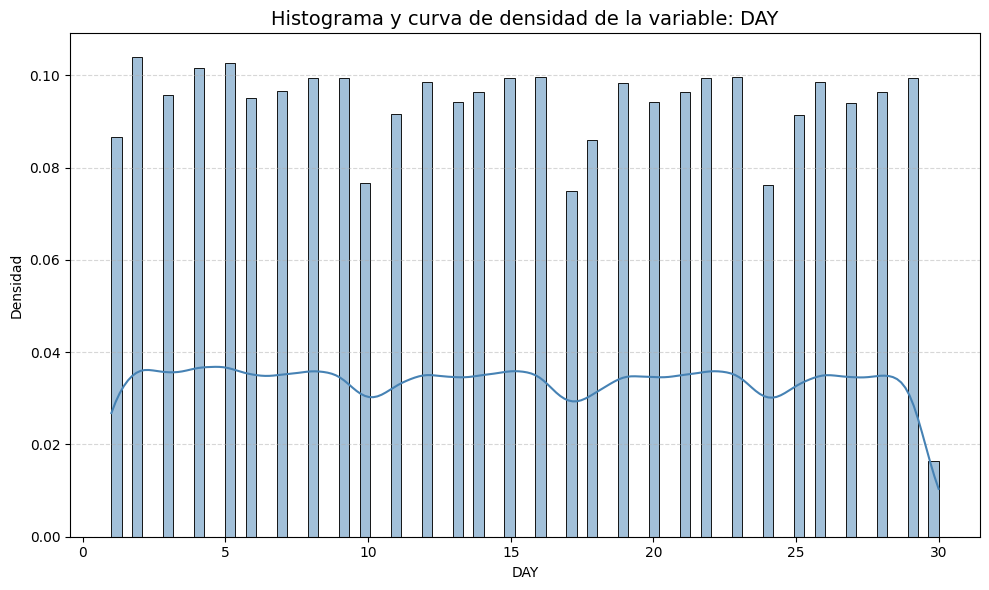

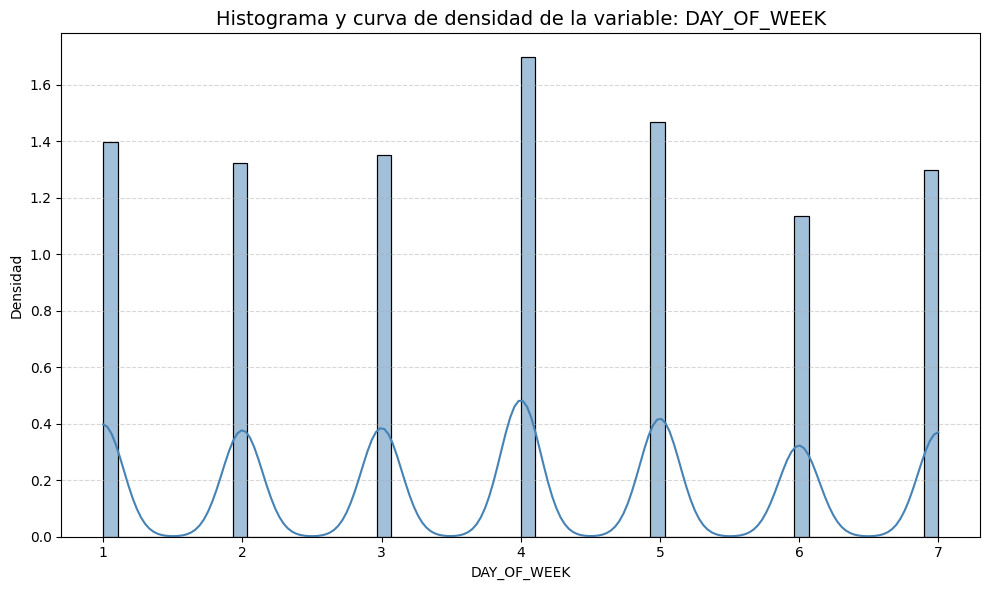

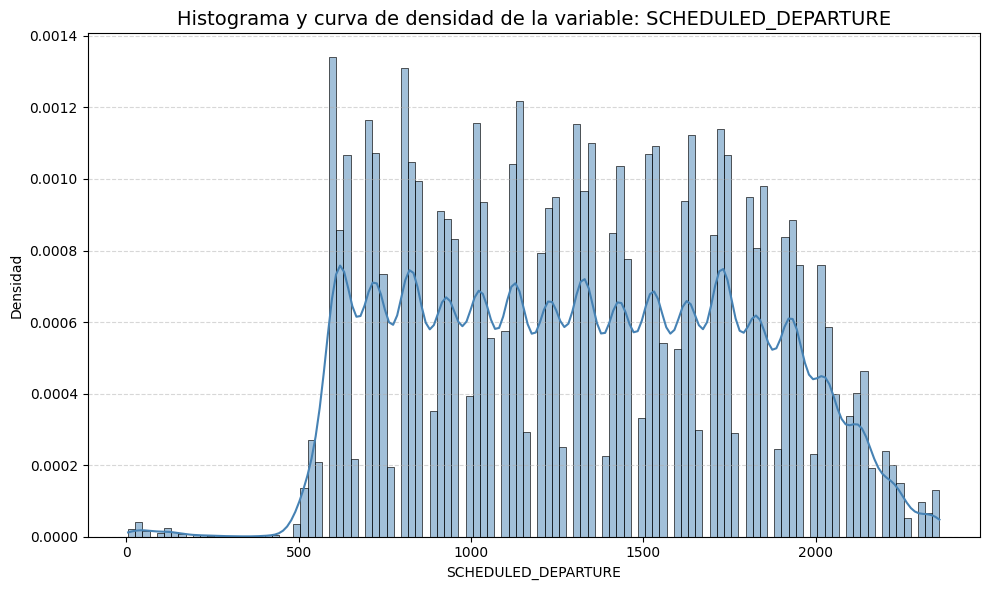

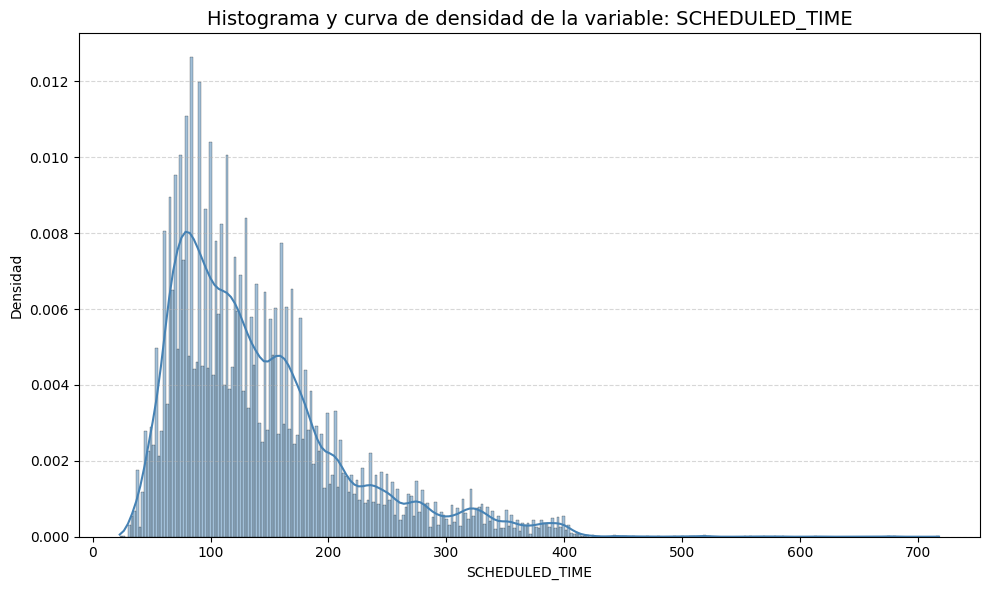

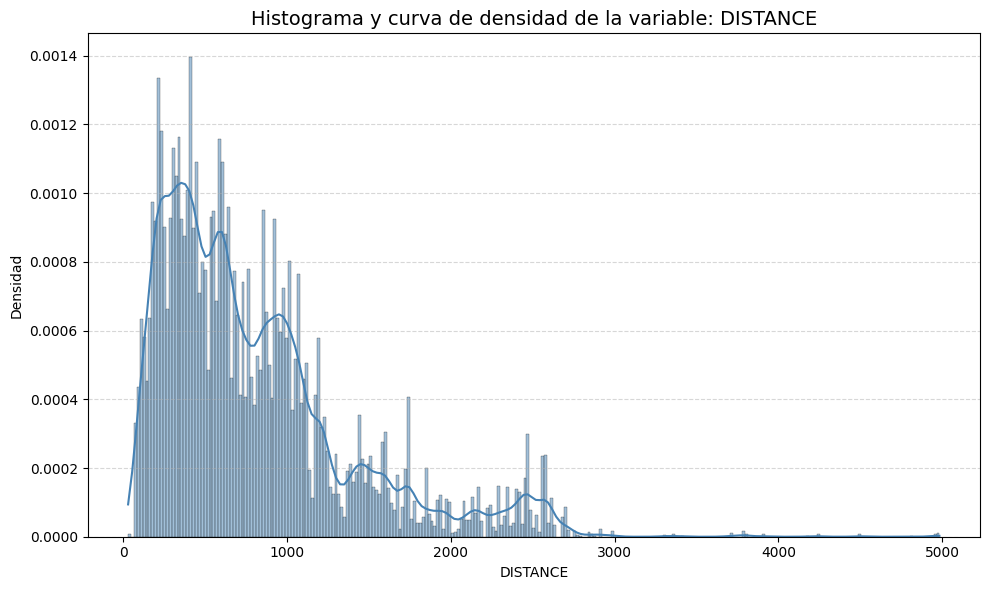

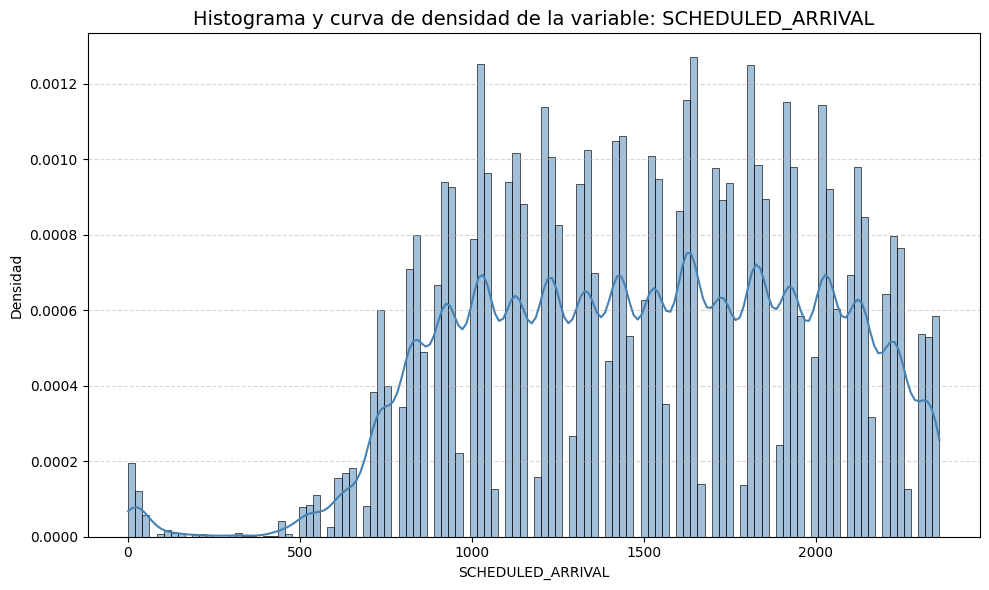

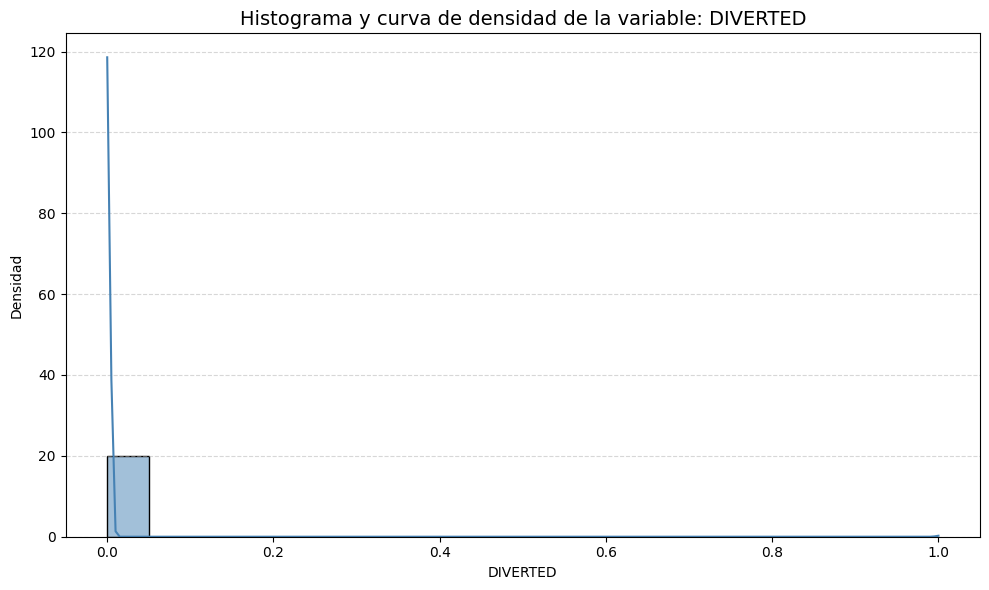

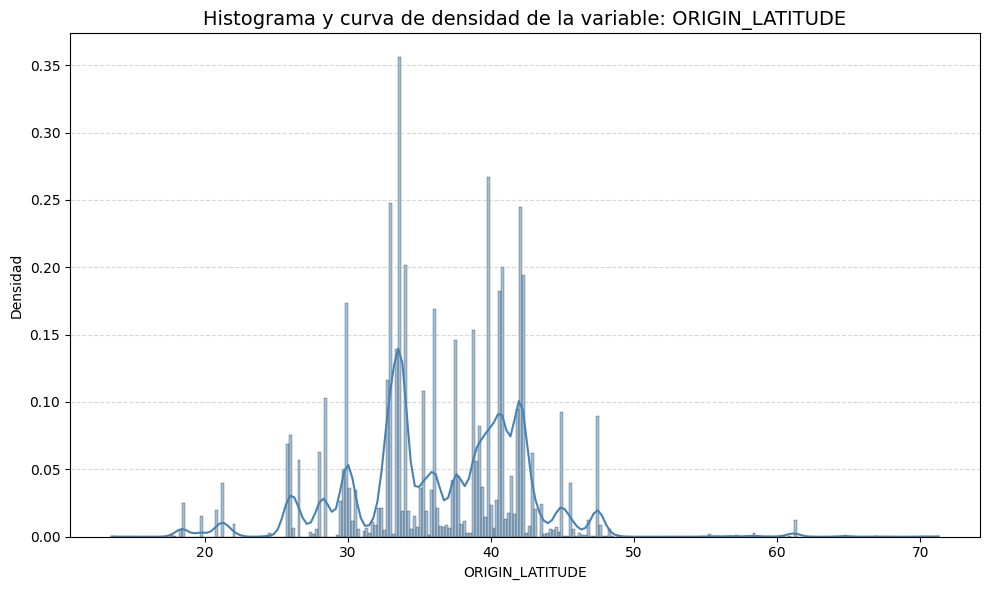

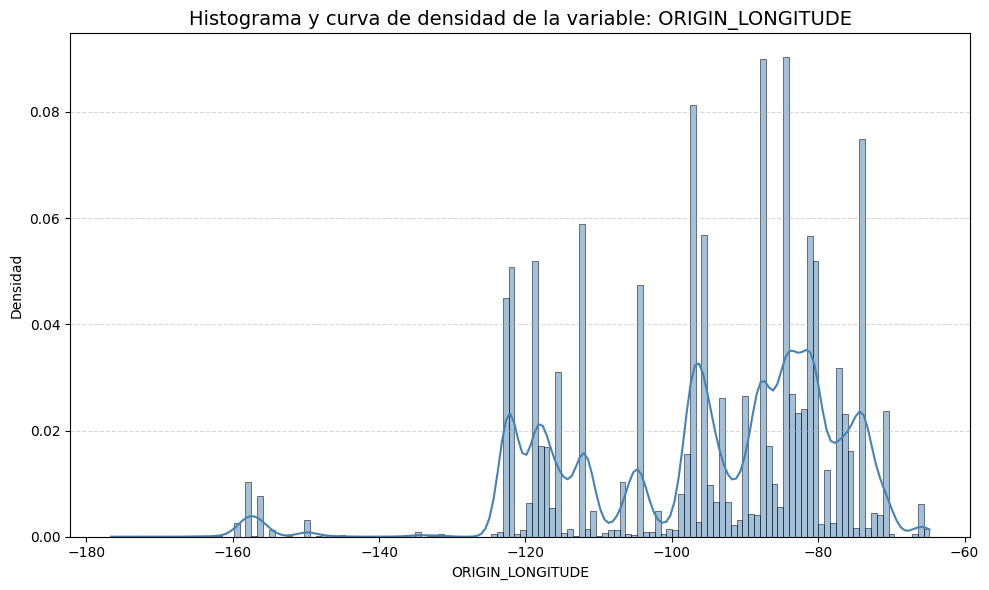

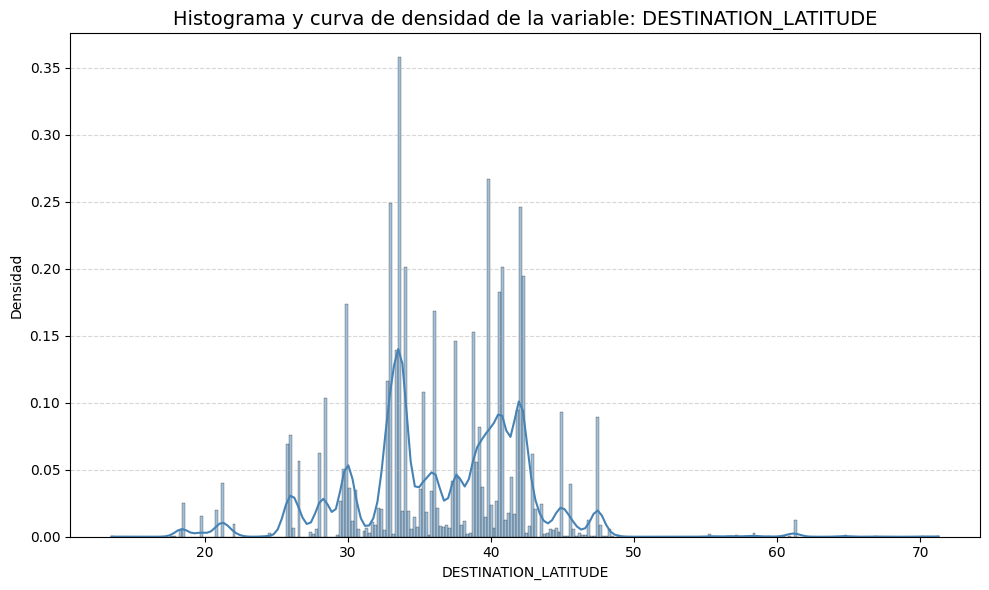

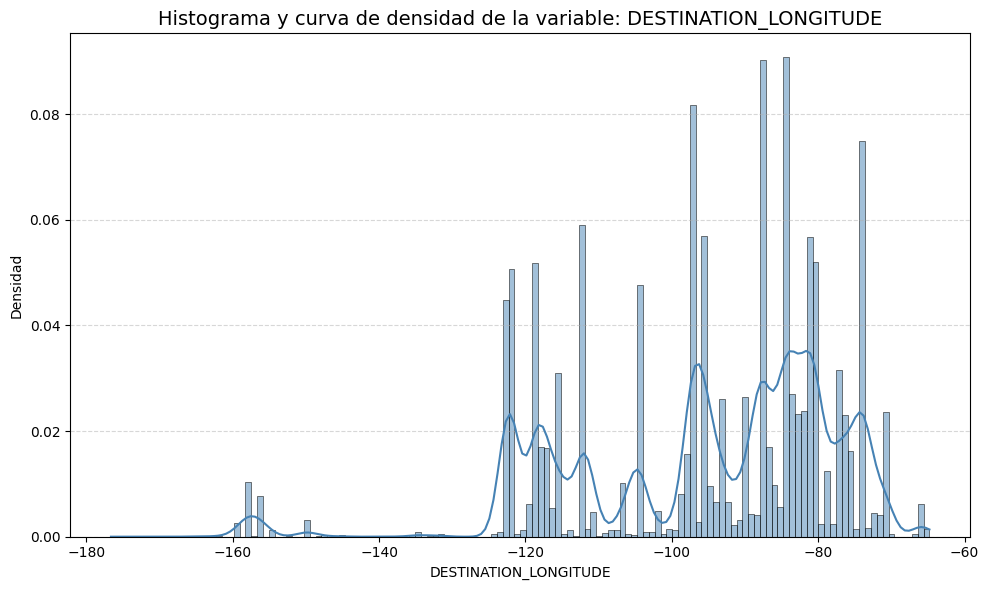

In [18]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, kde=True, stat="density", color="steelblue", edgecolor="black")

    plt.title(f"Histograma y curva de densidad de la variable: {column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

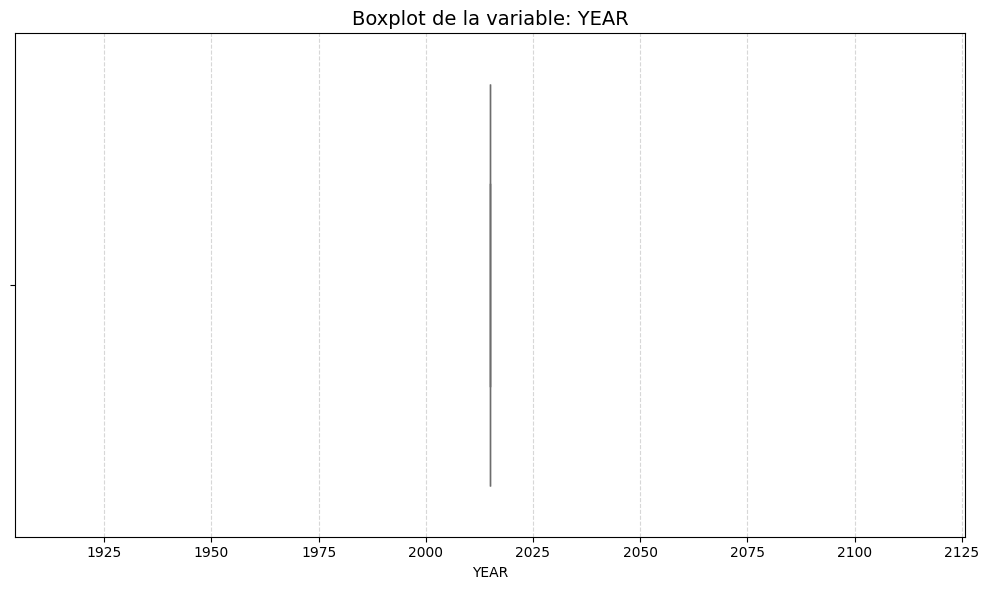

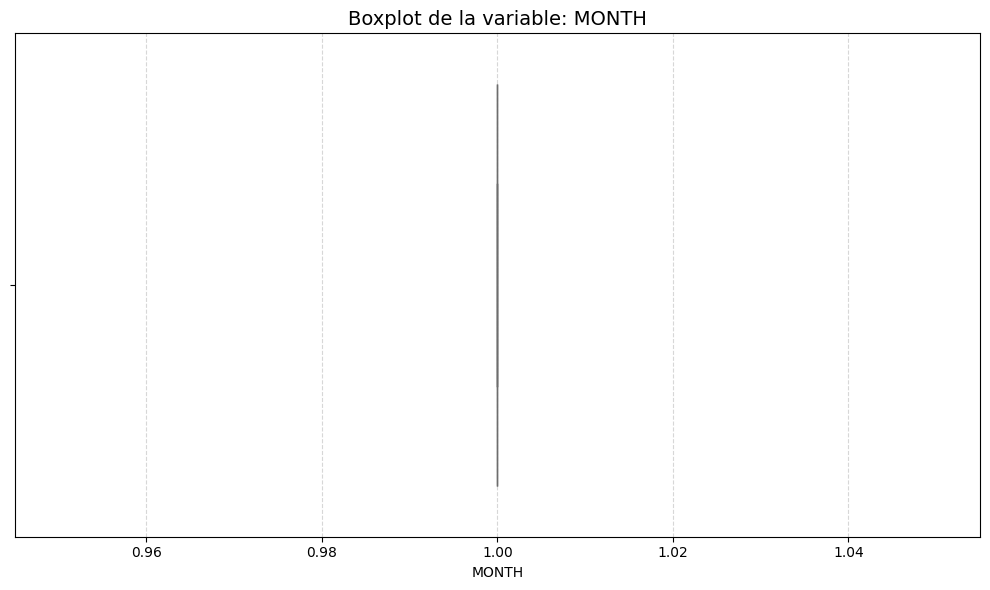

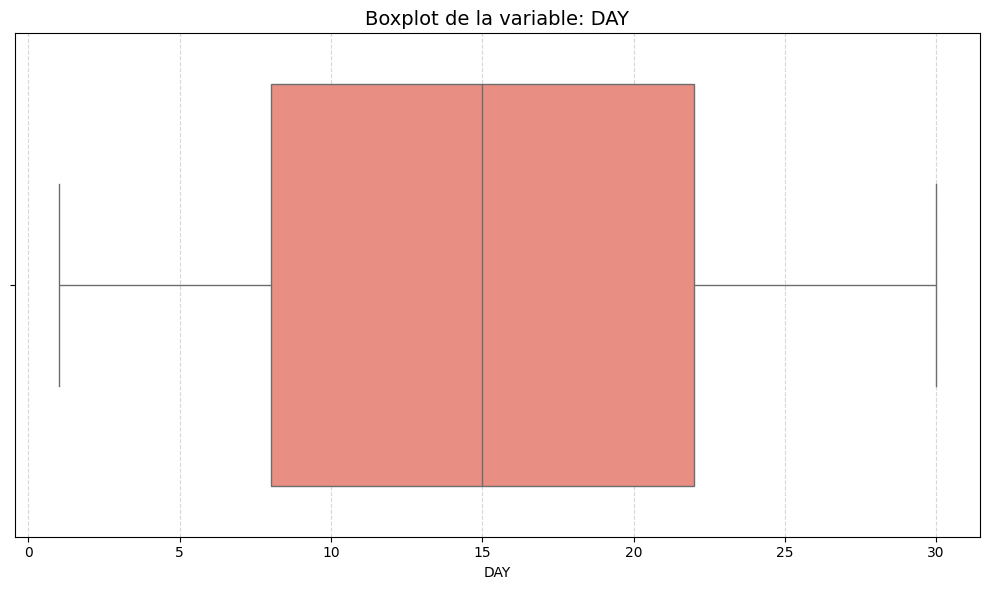

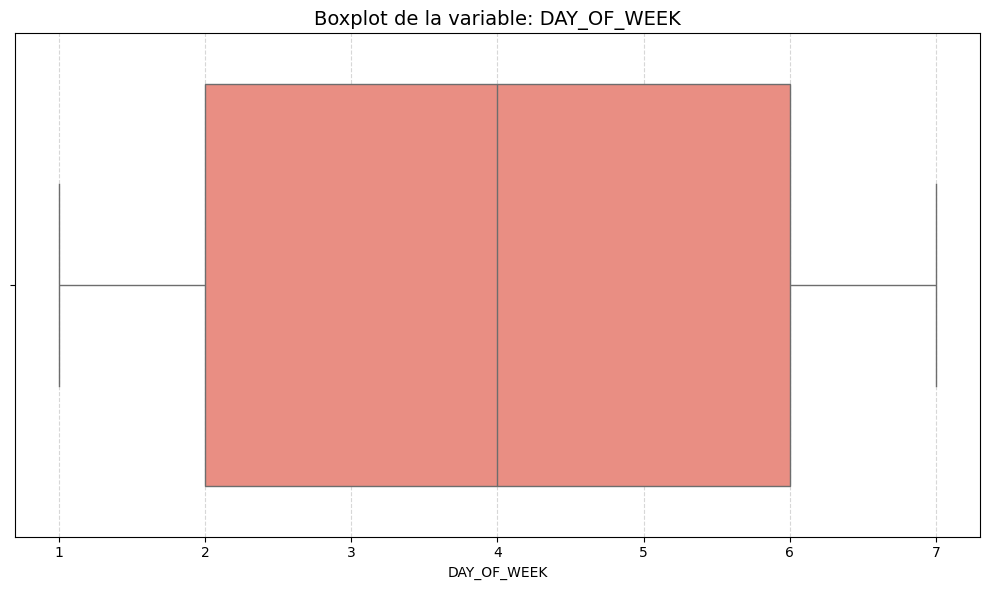

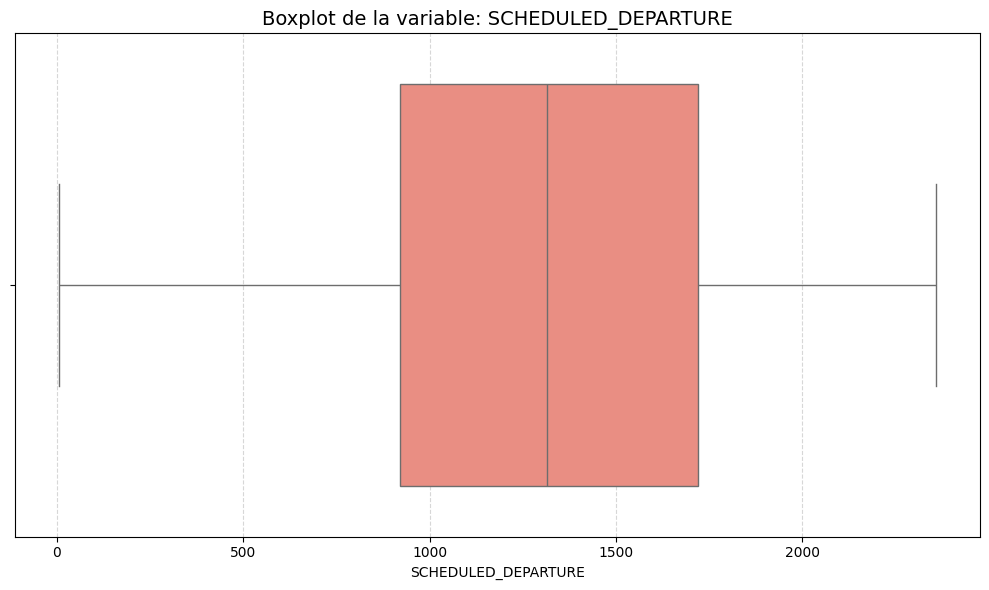

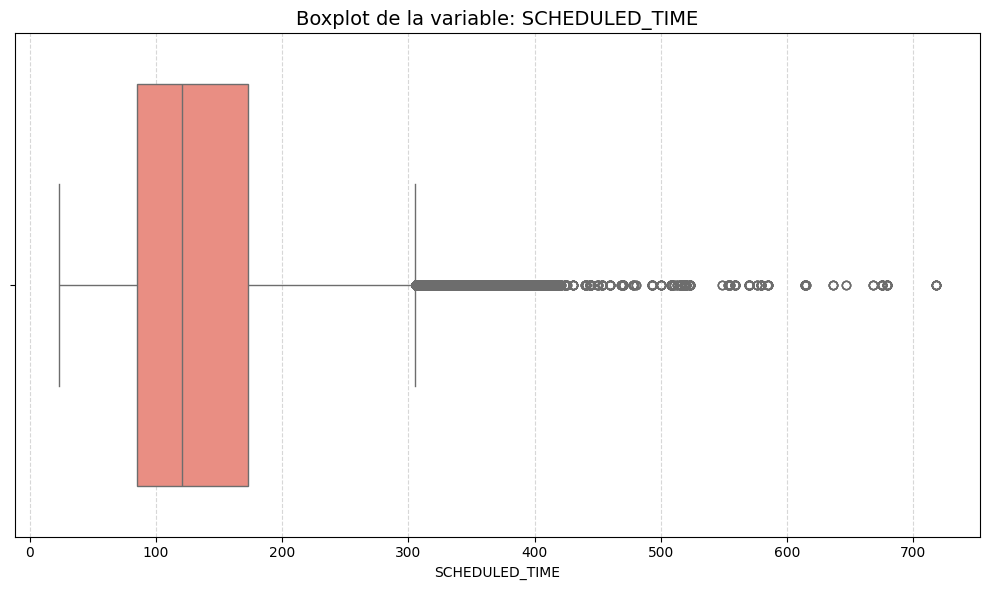

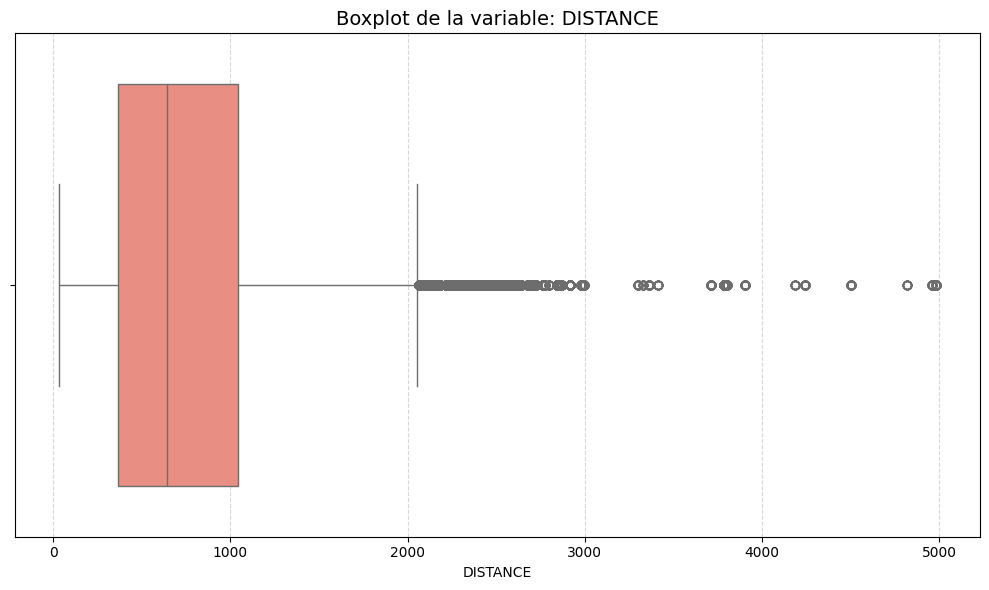

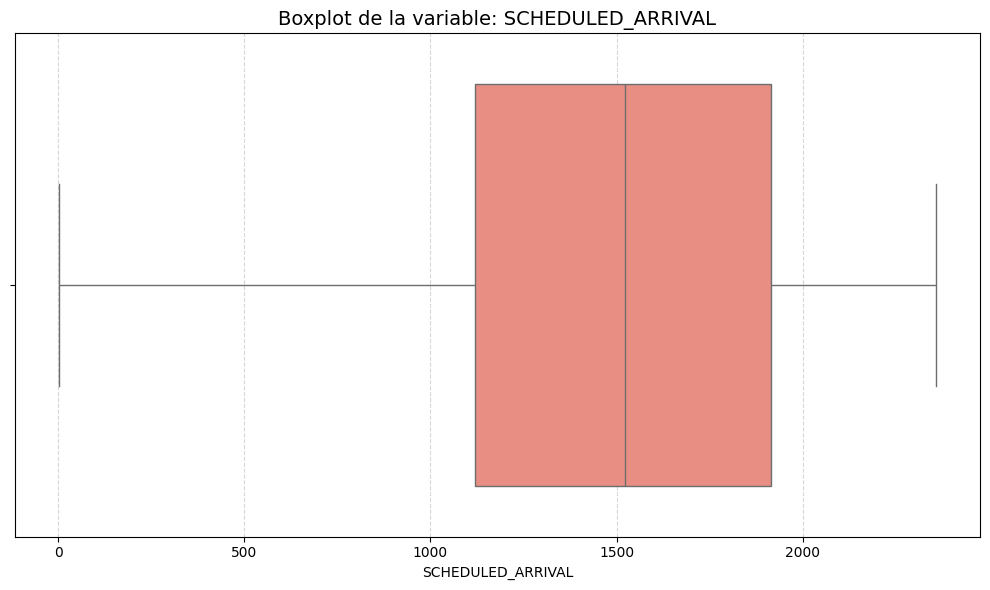

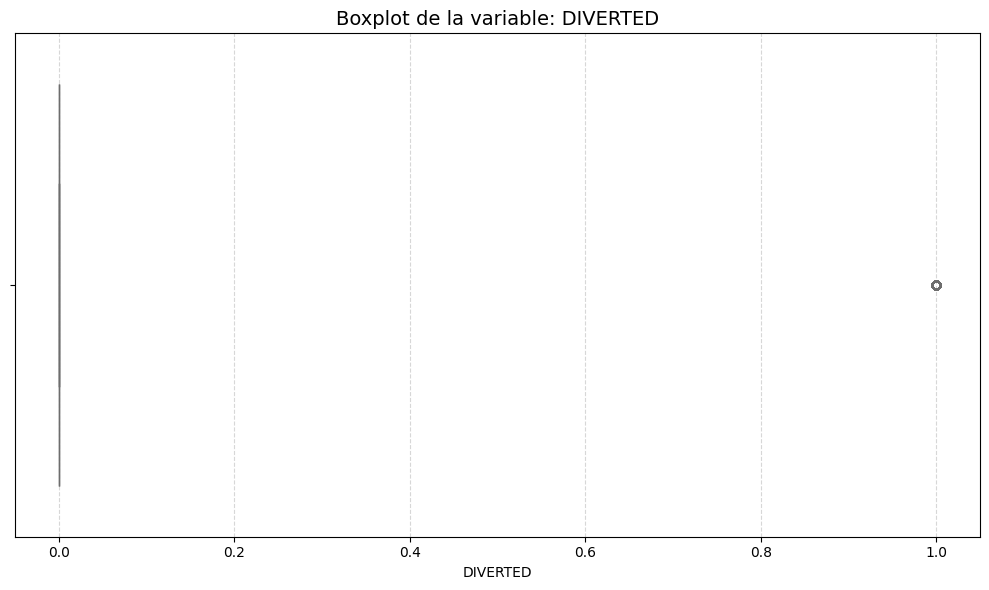

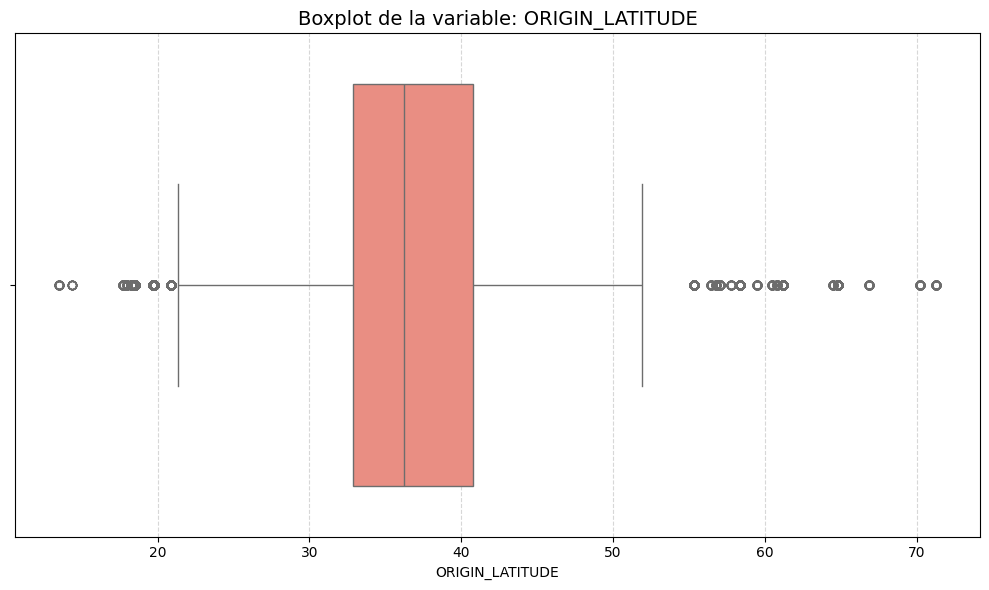

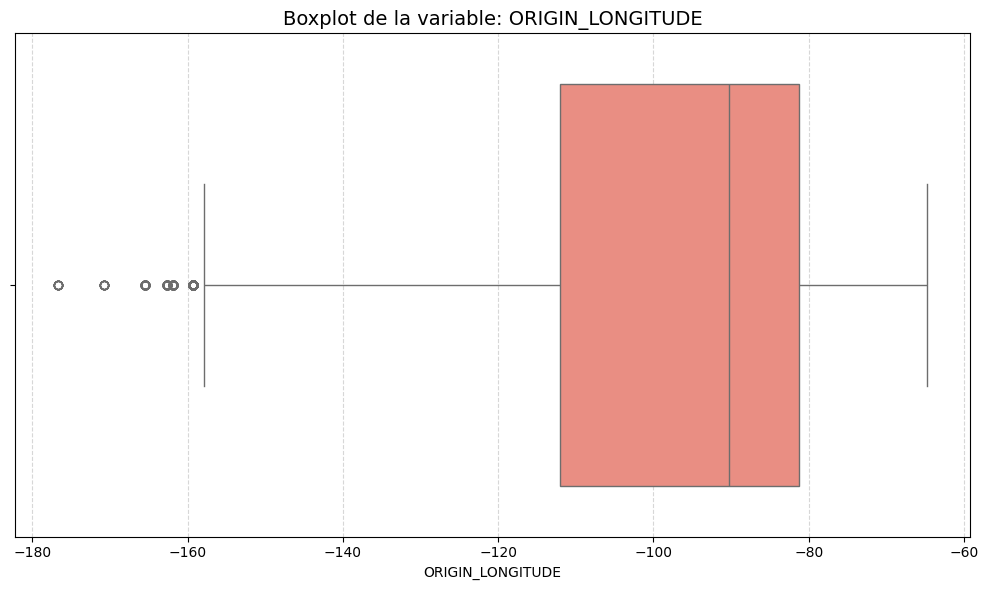

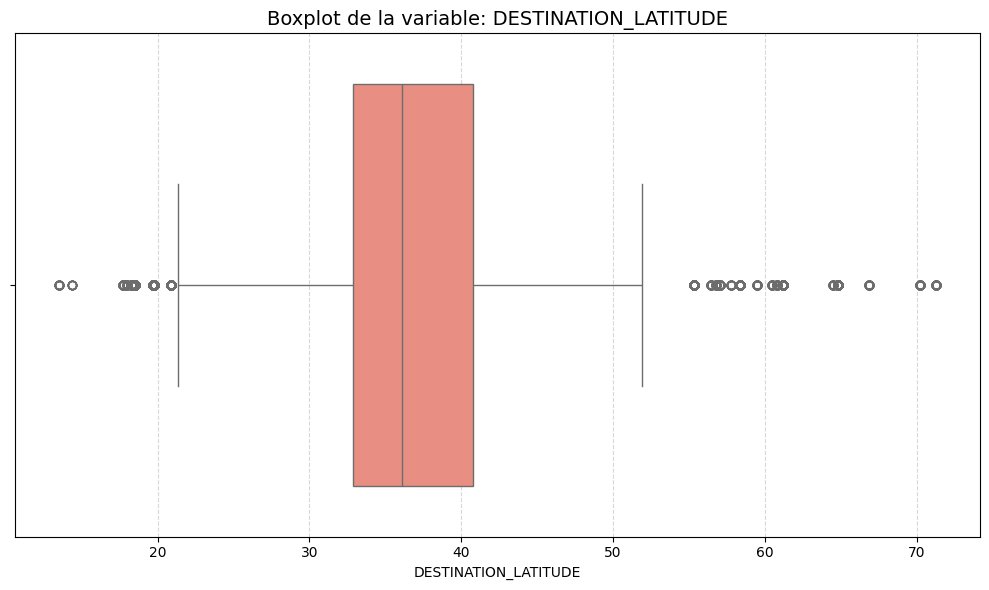

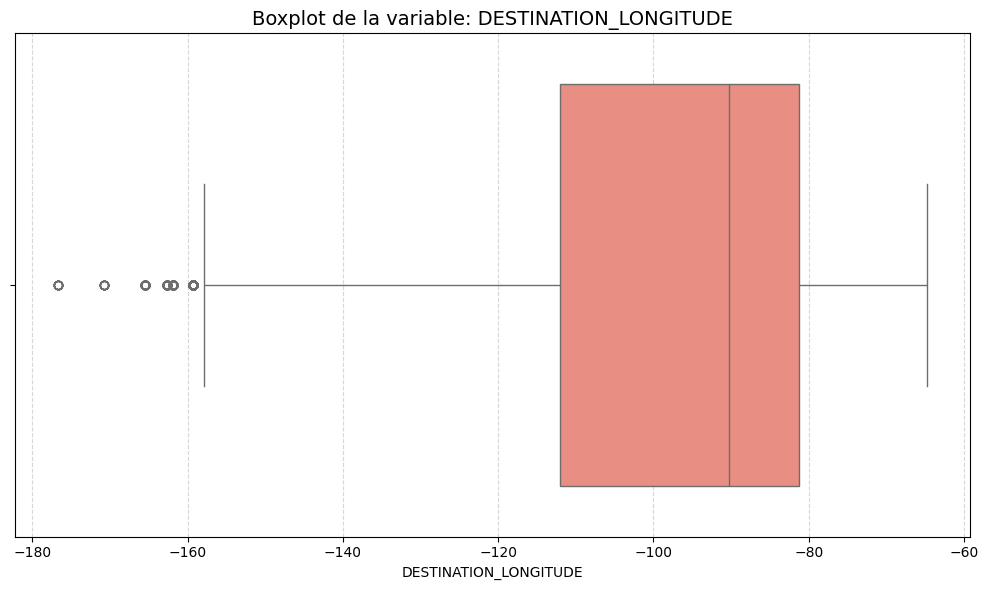

In [19]:
for column in numeric_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=column, color="salmon")

    plt.title(f"Boxplot de la variable: {column}", fontsize=14)
    plt.xlabel(column)
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

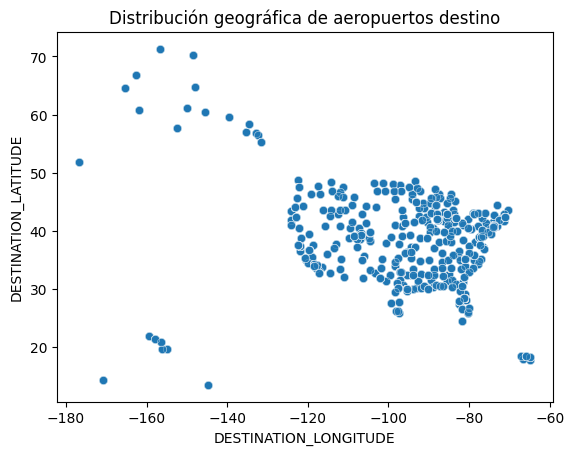

In [20]:
sns.scatterplot(data=df, x="DESTINATION_LONGITUDE", y="DESTINATION_LATITUDE", alpha=0.5)
plt.title("Distribución geográfica de aeropuertos destino")
plt.show()

Los outliers mostrados en latitud y longitud no son errores, sino coordenadas geográficas reales. No se modificarán los mismos.

In [21]:
cols_to_clean = ["SCHEDULED_TIME", "DISTANCE"]

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    col_median = df[col].median()

    num_outliers = ((df[col] < lower) | (df[col] > upper)).sum()

    print(f"{col}: {num_outliers} outliers reemplazados por la mediana ({col_median:.2f})")

    df.loc[(df[col] < lower) | (df[col] > upper), col] = col_median

SCHEDULED_TIME: 21297 outliers reemplazados por la mediana (121.00)
DISTANCE: 25797 outliers reemplazados por la mediana (641.00)


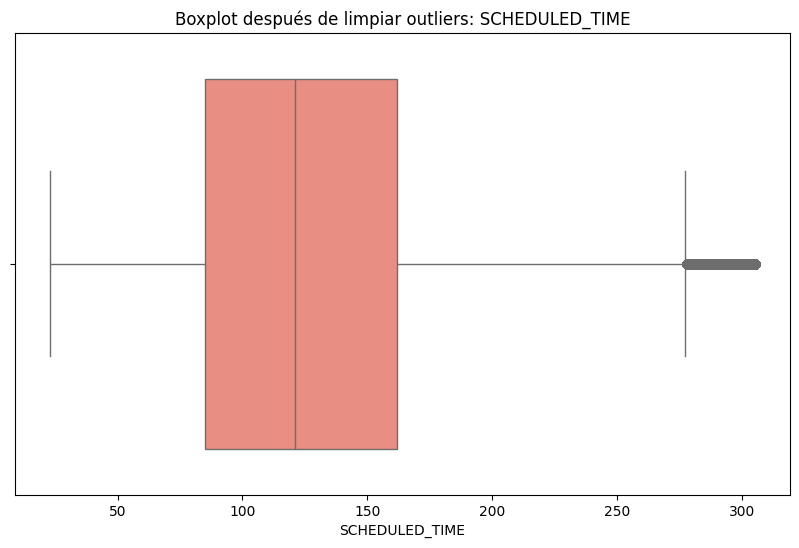

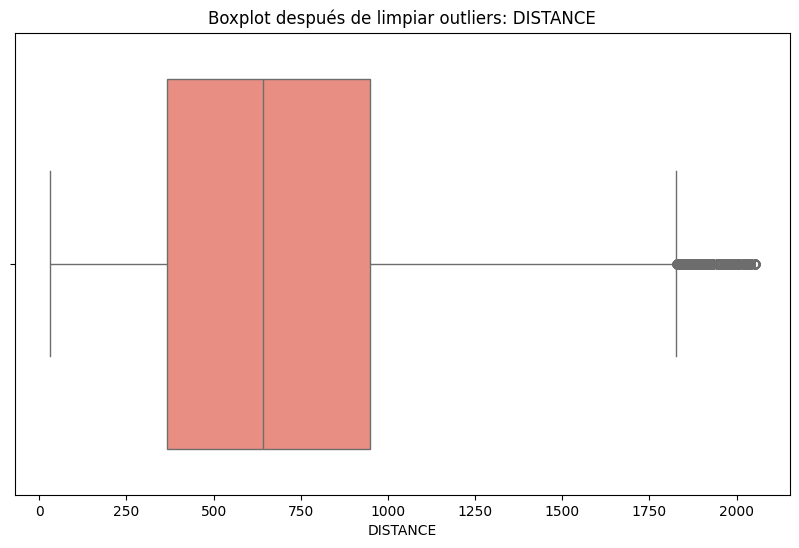

In [22]:
for col in cols_to_clean:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x=col, color="salmon")
    plt.title(f"Boxplot después de limpiar outliers: {col}")
    plt.show()

Se observó la presencia de valores atípicos en las variables SCHEDULED_TIME y DISTANCE, atribuibles a discrepancias operativas o registros erróneos.
Dado que estas variables son numéricas continuas y su distribución puede verse sesgada por valores extremos, se aplicó el método del rango intercuartílico (IQR).

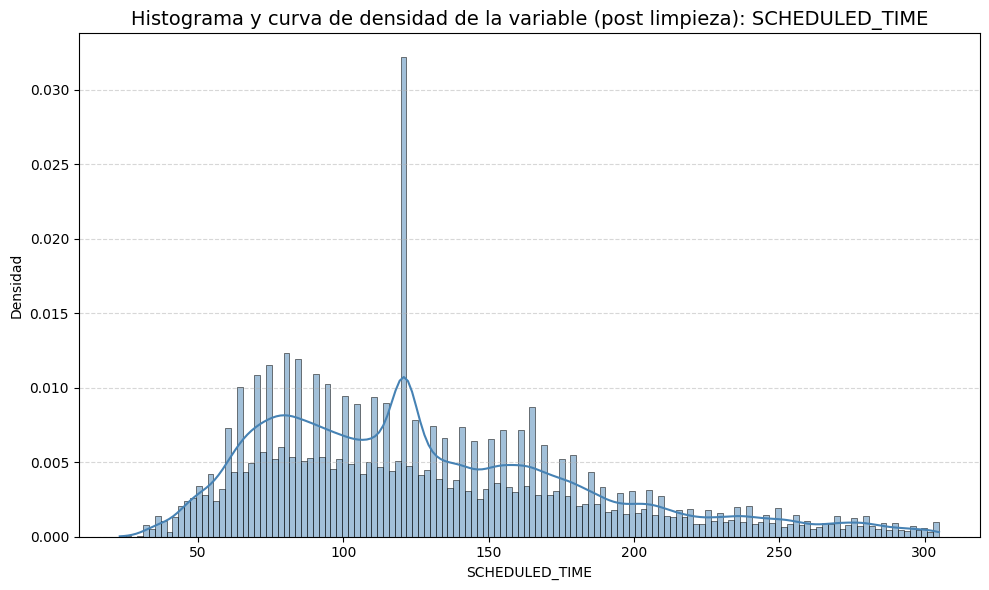

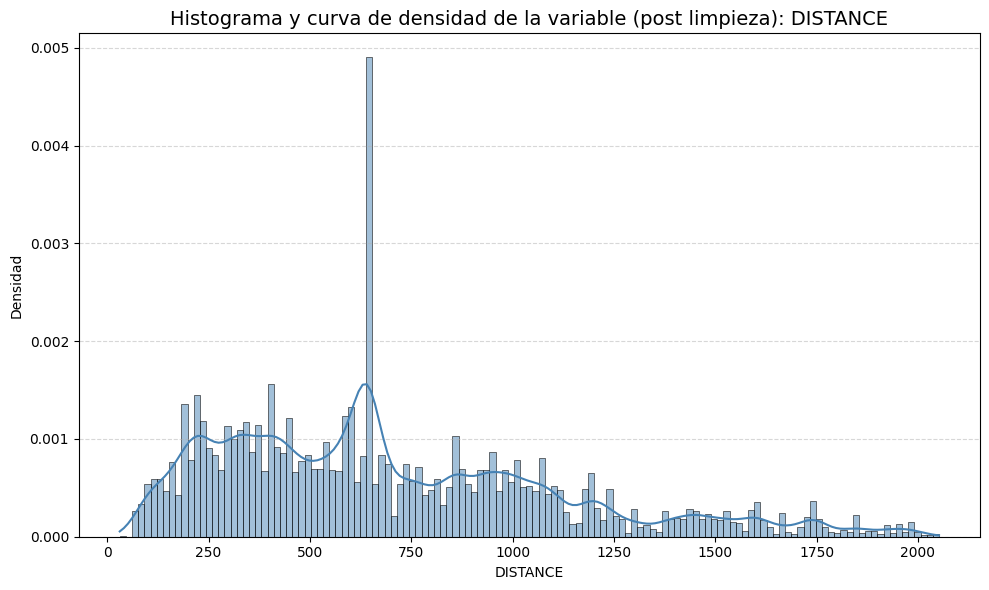

In [23]:
for column in cols_to_clean:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, kde=True, stat="density", color="steelblue", edgecolor="black")

    plt.title(f"Histograma y curva de densidad de la variable (post limpieza): {column}", fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Densidad")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

In [24]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'ORIGIN_STATE', 'ORIGIN_LATITUDE',
       'ORIGIN_LONGITUDE', 'DESTINATION_STATE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'AIRLINE_NAME'],
      dtype='object')

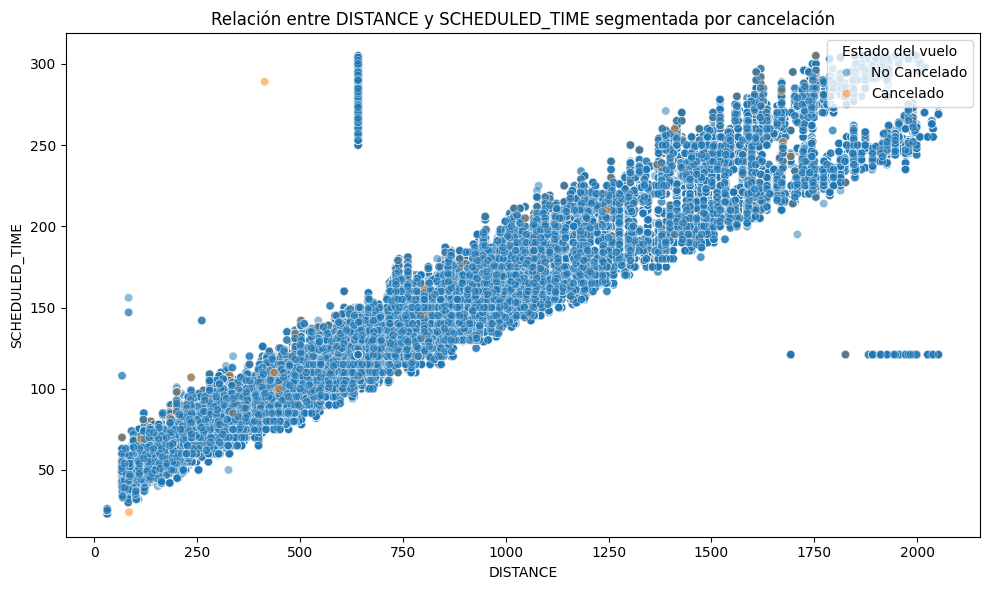

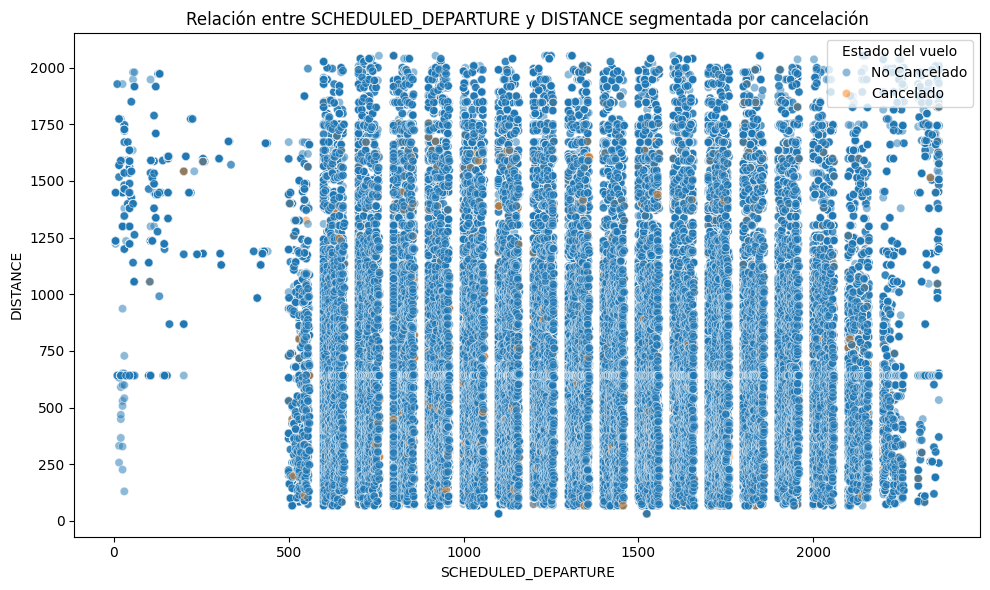

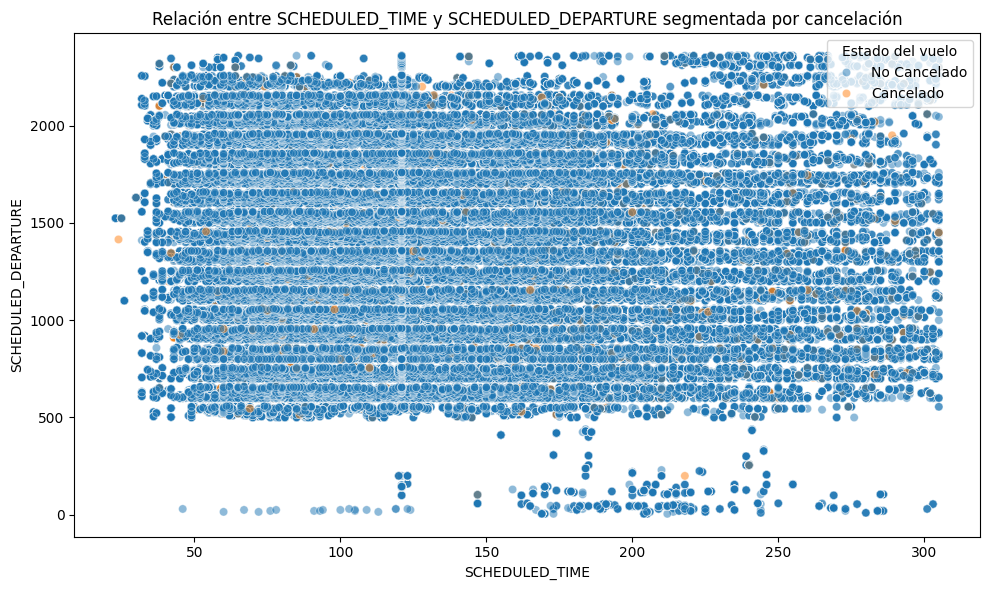

In [25]:
variables_to_compare = [
    ("DISTANCE", "SCHEDULED_TIME"),
    ("SCHEDULED_DEPARTURE", "DISTANCE"),
    ("SCHEDULED_TIME", "SCHEDULED_DEPARTURE")
]

for x_var, y_var in variables_to_compare:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=x_var, y=y_var, hue="CANCELLED", alpha=0.5)
    plt.title(f"Relación entre {x_var} y {y_var} segmentada por cancelación")
    plt.legend(title="Estado del vuelo", loc="upper right")
    plt.tight_layout()
    plt.show()

 - DISTANCE y SCHEDULED_TIME sí estan naturalmente correlacionada
 - No se observa una relación clara entre el horario programado de salida y la distancia del vuelo. Las cancelaciones (en naranja) se distribuyen de forma uniforme a lo largo de diferentes horas y distancias, lo que sugiere que la distancia del vuelo no influye directamente en la probabilidad de cancelación.
 - La duración programada del vuelo se distribuye de manera uniforme a lo largo de las diferentes horas de salida, sin mostrar relación con la ocurrencia de cancelaciones.”

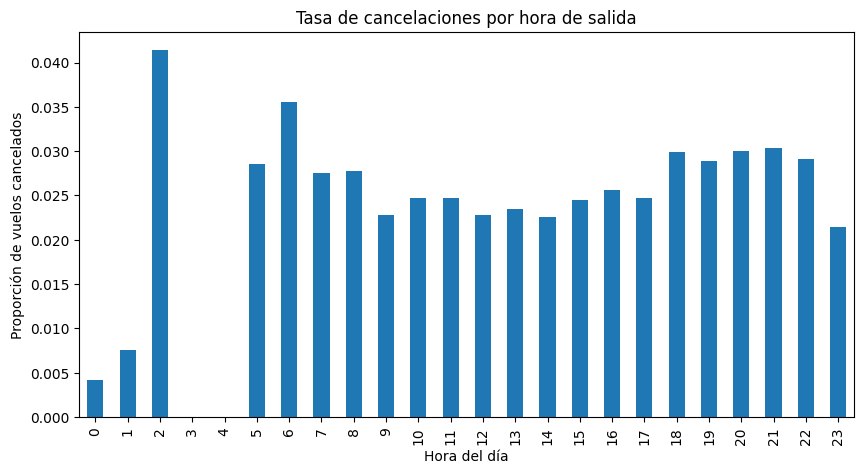

In [26]:
df["CANCELLED_NUM"] = df["CANCELLED"].apply(lambda x: 1 if x == "Cancelado" else 0)

df["DEPARTURE_HOUR"] = (df["SCHEDULED_DEPARTURE"] // 100).astype(int)

cancel_rate = df.groupby("DEPARTURE_HOUR")["CANCELLED_NUM"].mean()

cancel_rate.plot(kind="bar", figsize=(10,5))
plt.title("Tasa de cancelaciones por hora de salida")
plt.ylabel("Proporción de vuelos cancelados")
plt.xlabel("Hora del día")
plt.show()

Alrededor de las primeras horas de la mañana (0–1 h) y el mediodía (10–15 h) parece haber menor incidencia de cancelaciones (< 3 %).
Es probable que en ese rango el tráfico sea más regular y las condiciones operativas más estables.

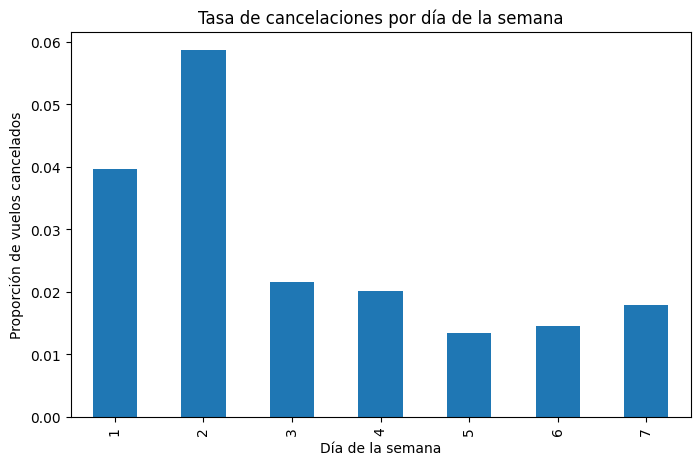

In [27]:
cancel_rate_day = df.groupby("DAY_OF_WEEK")["CANCELLED_NUM"].mean()
cancel_rate_day.plot(kind="bar", figsize=(8,5))
plt.title("Tasa de cancelaciones por día de la semana")
plt.ylabel("Proporción de vuelos cancelados")
plt.xlabel("Día de la semana")
plt.show()

Se observa que la tasa de cancelaciones es mayor al inicio de la semana (especialmente lunes y martes), disminuye entre miércoles y sábado, y vuelve a incrementarse los domingos, lo que sugiere un patrón semanal en la ocurrencia de cancelaciones.

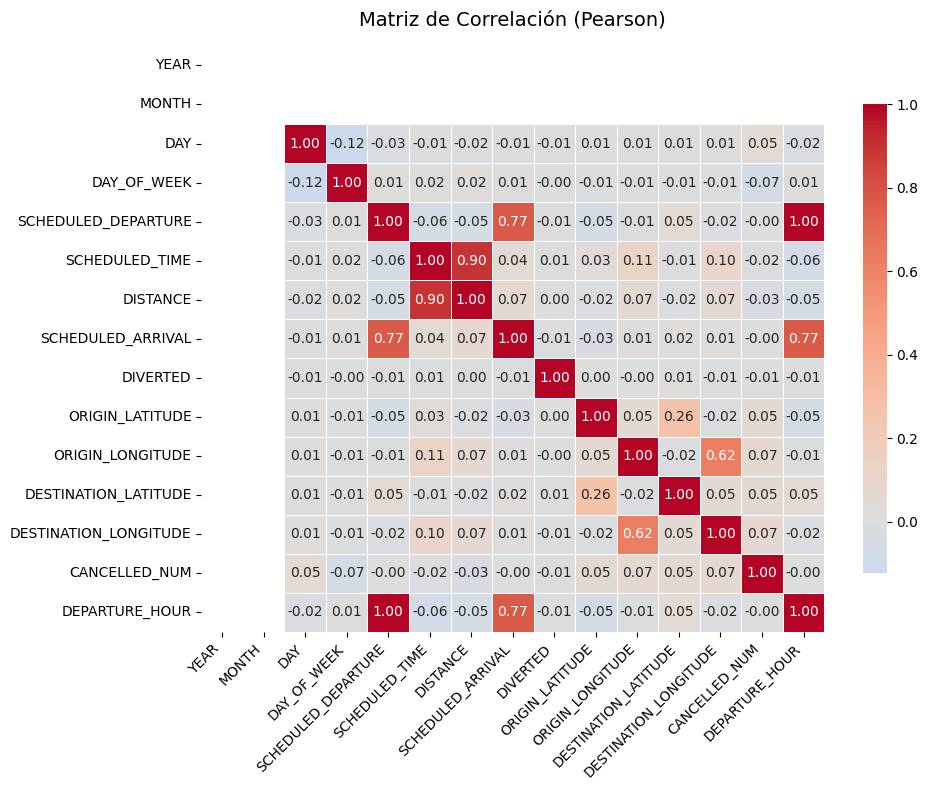

In [28]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
corr_matrix = df[numeric_columns].corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title("Matriz de Correlación (Pearson)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- DISTANCE y SCHEDULED_TIME (0.90): Correlación alta y positiva. Tiene sentido, porque los vuelos más largos (mayor distancia) suelen tener mayor duración programada.

- SCHEDULED_DEPARTURE y SCHEDULED_ARRIVAL (0.77): También alta y positiva; los vuelos que salen más tarde naturalmente llegan más tarde.

- ORIGIN_LONGITUDE y DESTINATION_LONGITUDE (0.62): Muchos vuelos ocurren dentro de una misma zona longitudinal (por ejemplo, dentro del mismo país o costa).

- Correlación con la variable objetivo CANCELLED_NUM: Todas las correlaciones son muy bajas (entre -0.03 y 0.08), lo que indica que ninguna variable numérica por sí sola explica las cancelaciones.

In [30]:
df.to_csv("dataset_merged_processed_no_outliers.csv", index=False)